In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("credit_risk_dataset.CSV")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype== "object":
        cat.append(i)
    else:
        num.append(i)

In [7]:
print(cat)
print("*****************************************")
print(num)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
*****************************************
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df["person_emp_length"]=df["person_emp_length"].fillna(df["person_emp_length"].median())

In [10]:
df["loan_int_rate"]=df["loan_int_rate"].fillna(df["loan_int_rate"].median())

In [11]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Feature = person_home_ownership

mode: 0    RENT
Name: person_home_ownership, dtype: object
Value_counts:
 RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64


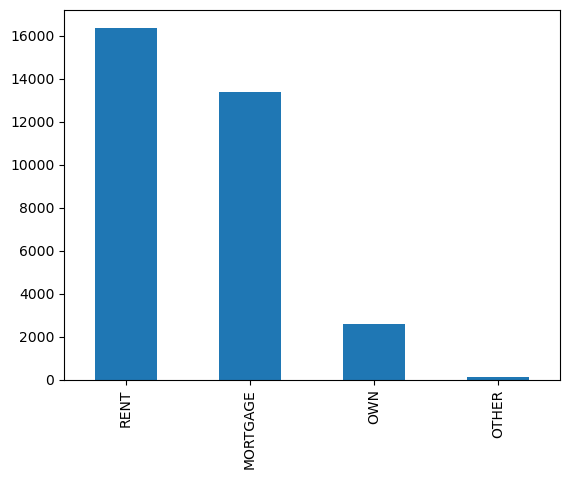

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = loan_intent

mode: 0    EDUCATION
Name: loan_intent, dtype: object
Value_counts:
 EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64


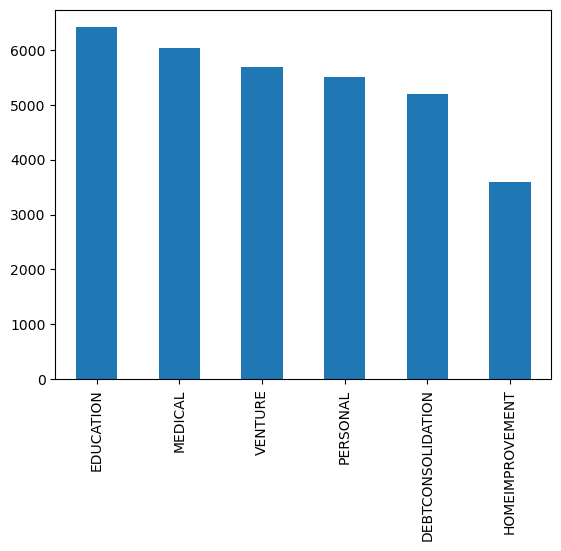

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = loan_grade

mode: 0    A
Name: loan_grade, dtype: object
Value_counts:
 A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64


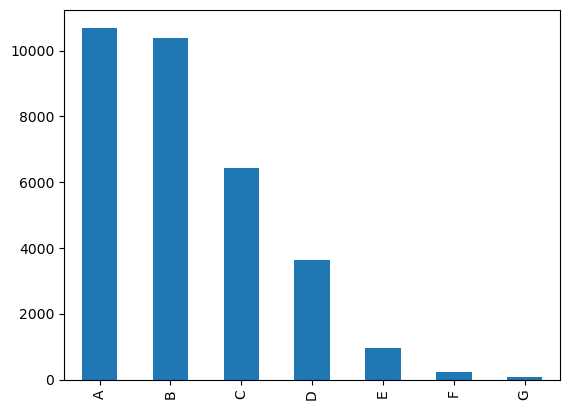

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = cb_person_default_on_file

mode: 0    N
Name: cb_person_default_on_file, dtype: object
Value_counts:
 N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64


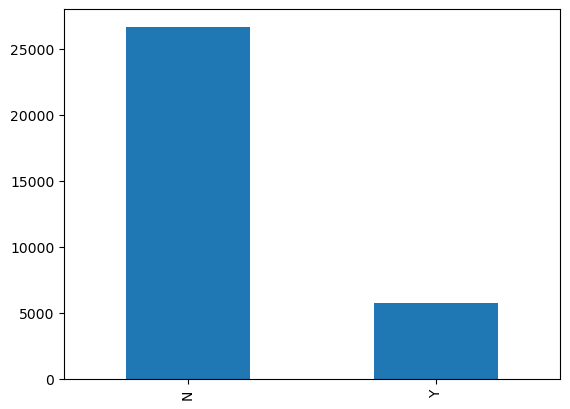

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************


In [12]:
for column in cat:
    print("Feature =",column)
    print()
    print("mode:",df[column].mode())
    print("Value_counts:\n",df[column].value_counts())
    print(df[column].value_counts().plot(kind = 'bar'),plt.show())
    print("******************************************************************")

Column:- person_age
Mean:- 27.74700765054294
Median:- 26.0
Std:- 6.354099947312116
min:- 20
max:- 144


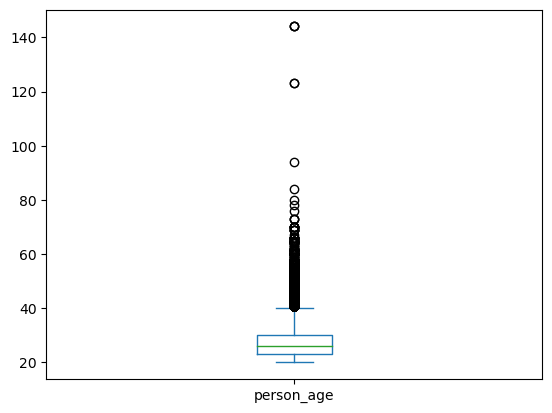

AxesSubplot(0.125,0.11;0.775x0.77) None


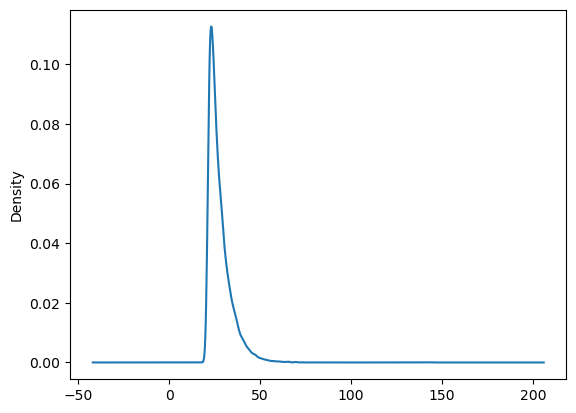

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- person_income
Mean:- 66091.64082551826
Median:- 55000.0
Std:- 62015.58026889586
min:- 4000
max:- 6000000


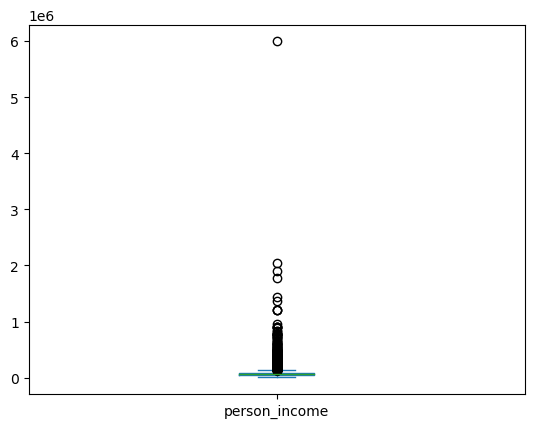

AxesSubplot(0.125,0.11;0.775x0.77) None


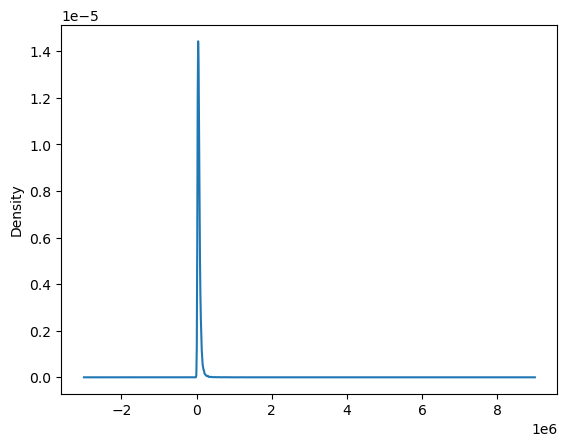

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- person_emp_length
Mean:- 4.7688795656465945
Median:- 4.0
Std:- 4.090411377660699
min:- 0.0
max:- 123.0


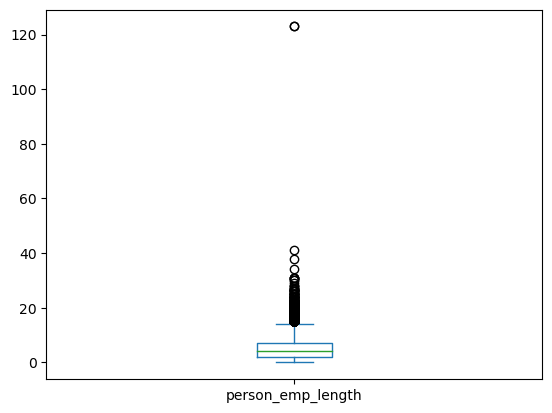

AxesSubplot(0.125,0.11;0.775x0.77) None


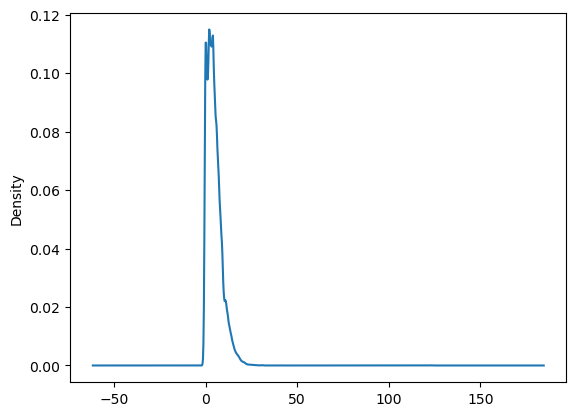

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- loan_amnt
Mean:- 9593.845631786771
Median:- 8000.0
Std:- 6322.7302408617625
min:- 500
max:- 35000


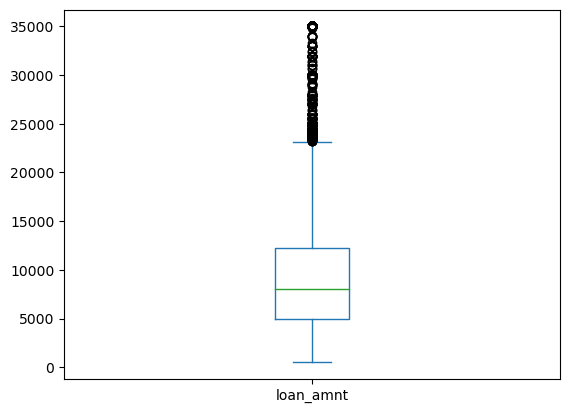

AxesSubplot(0.125,0.11;0.775x0.77) None


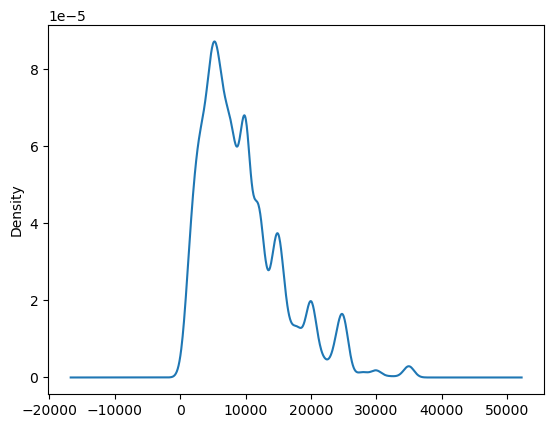

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- loan_int_rate
Mean:- 11.014661895359158
Median:- 10.99
Std:- 3.0830504659623212
min:- 5.42
max:- 23.22


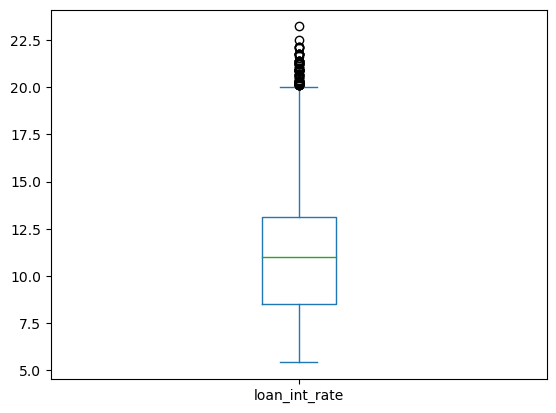

AxesSubplot(0.125,0.11;0.775x0.77) None


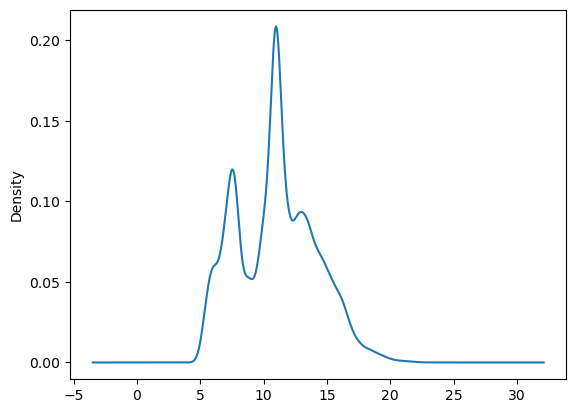

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- loan_status
Mean:- 0.21868830207305034
Median:- 0.0
Std:- 0.4133630362539111
min:- 0
max:- 1


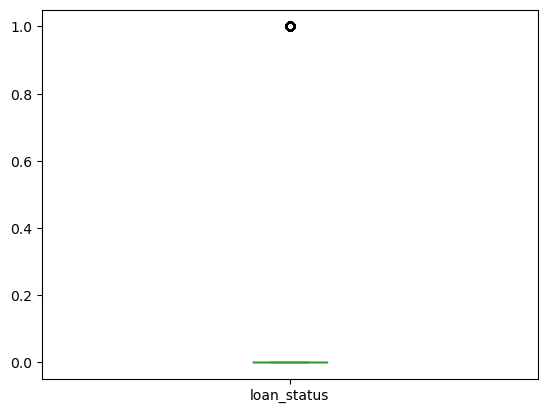

AxesSubplot(0.125,0.11;0.775x0.77) None


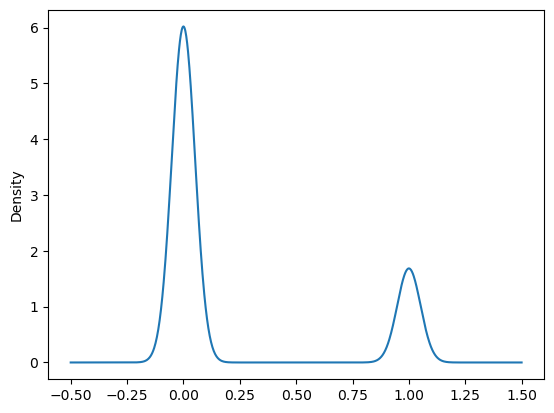

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- loan_percent_income
Mean:- 0.17024987660415125
Median:- 0.15
Std:- 0.10681197337092144
min:- 0.0
max:- 0.83


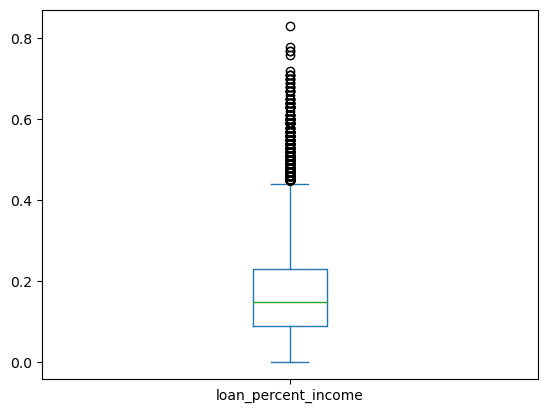

AxesSubplot(0.125,0.11;0.775x0.77) None


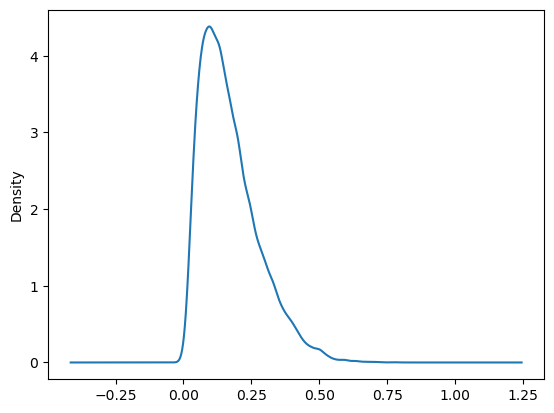

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- cb_person_cred_hist_length
Mean:- 5.811296890424482
Median:- 4.0
Std:- 4.059030349939405
min:- 2
max:- 30


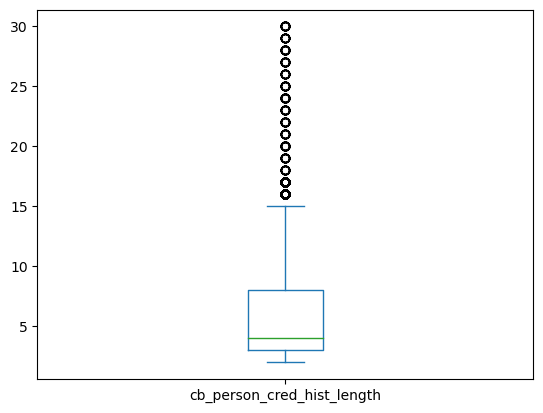

AxesSubplot(0.125,0.11;0.775x0.77) None


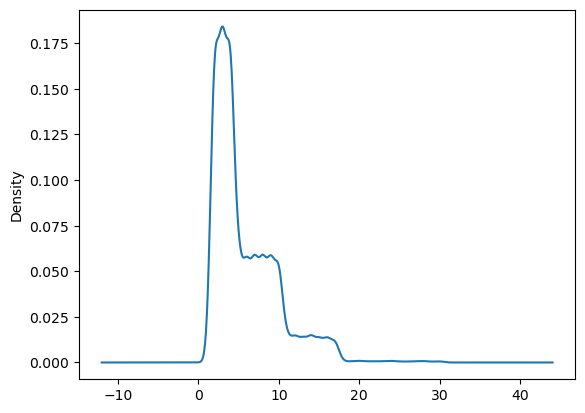

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************


In [13]:
for i in num:
    print("Column:-",i)
    print('Mean:-',df[i].mean())
    print('Median:-',df[i].median())
    print("Std:-",df[i].std())
    print("min:-",df[i].min())
    print("max:-",df[i].max())
    print(df[i].plot(kind="box"),plt.show())
    print(df[i].plot(kind="kde"),plt.show())
    print()
    print("*************************************************************")

### Outliers Treatment

Q1 = 23.0
Q3 = 30.0
IQR = 7.0
lower = 12.5
Upper = 40.5


<AxesSubplot:>

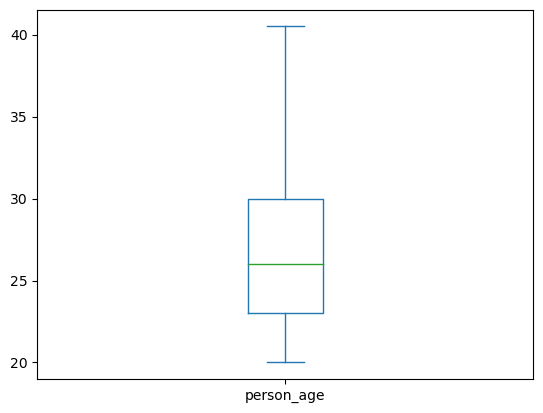

In [14]:
#Treating Outliers
q1_age=df['person_age'].quantile(0.25)
q3_age=df['person_age'].quantile(0.75)

IQR=q3_age-q1_age

lower_age= q1_age-1.5*IQR
upper_age= q3_age+1.5*IQR

print("Q1 =",q1_age)
print("Q3 =",q3_age)
print("IQR =",IQR)
print("lower =",lower_age)
print("Upper =",upper_age)

df["person_age"]=df["person_age"].map(lambda x:lower_age if x<lower_age else upper_age if x>upper_age else x)
df["person_age"].plot(kind="box")

Q1 = 38542.0
Q3 = 79218.0
IQR = 40676.0
lower = -22472.0
Upper = 140232.0


<AxesSubplot:>

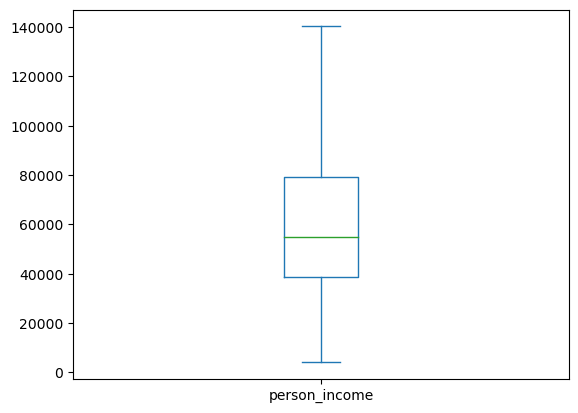

In [15]:
#Treating Outliers
q1=df['person_income'].quantile(0.25)
q3=df['person_income'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

df["person_income"]=df["person_income"].map(lambda x:lower if x<lower else upper if x>upper else x)
df["person_income"].plot(kind="box")

Q1 = 2.0
Q3 = 7.0
IQR = 5.0
lower = -5.5
Upper = 14.5


<AxesSubplot:>

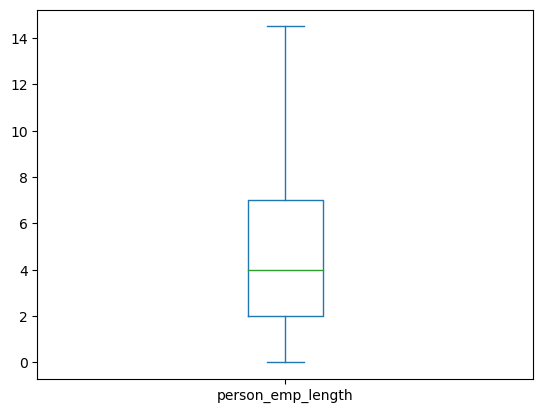

In [16]:
#Treating Outliers
q1=df['person_emp_length'].quantile(0.25)
q3=df['person_emp_length'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

df["person_emp_length"]=df["person_emp_length"].map(lambda x:lower if x<lower else upper if x>upper else x)
df["person_emp_length"].plot(kind="box")

Q1 = 5000.0
Q3 = 12250.0
IQR = 7250.0
lower = -5875.0
Upper = 23125.0


<AxesSubplot:>

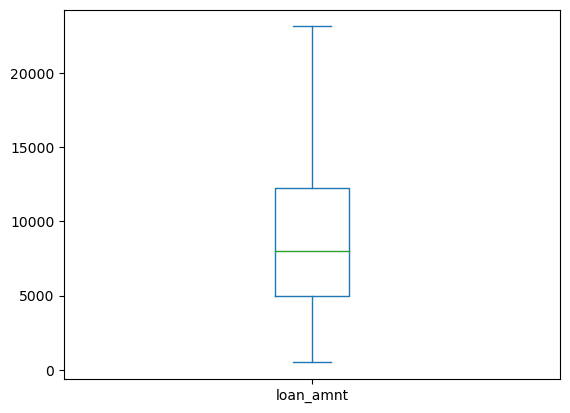

In [17]:
#Treating Outliers
q1=df['loan_amnt'].quantile(0.25)
q3=df['loan_amnt'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

df["loan_amnt"]=df["loan_amnt"].map(lambda x:lower if x<lower else upper if x>upper else x)
df["loan_amnt"].plot(kind="box")

Q1 = 8.49
Q3 = 13.11
IQR = 4.619999999999999
lower = 1.5600000000000014
Upper = 20.04


<AxesSubplot:>

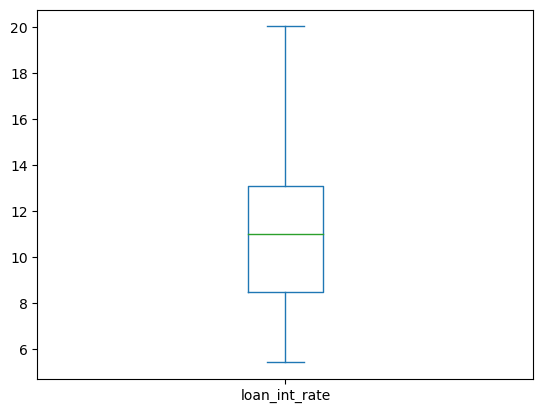

In [18]:
#Treating Outliers
q1=df['loan_int_rate'].quantile(0.25)
q3=df['loan_int_rate'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

df["loan_int_rate"]=df["loan_int_rate"].map(lambda x: lower if x<lower else upper if x>upper else x)
df["loan_int_rate"].plot(kind="box")

Q1 = 0.09
Q3 = 0.23
IQR = 0.14
lower = -0.12000000000000002
Upper = 0.44000000000000006


<AxesSubplot:>

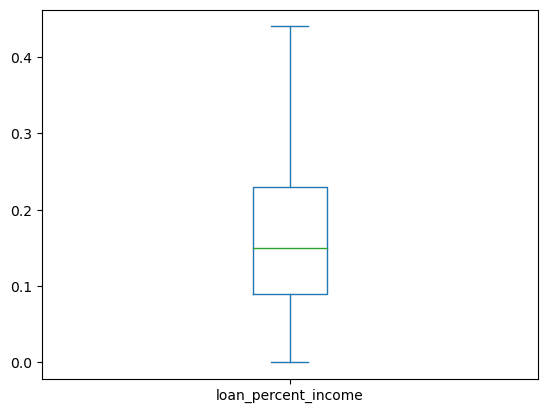

In [19]:
#Treating Outliers
q1=df['loan_percent_income'].quantile(0.25)
q3=df['loan_percent_income'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)


df["loan_percent_income"]=df["loan_percent_income"].map(lambda x:lower if x<lower else upper if x>upper else x)
df["loan_percent_income"].plot(kind="box")

Q1 = 3.0
Q3 = 8.0
IQR = 5.0
lower = -4.5
Upper = 15.5


<AxesSubplot:>

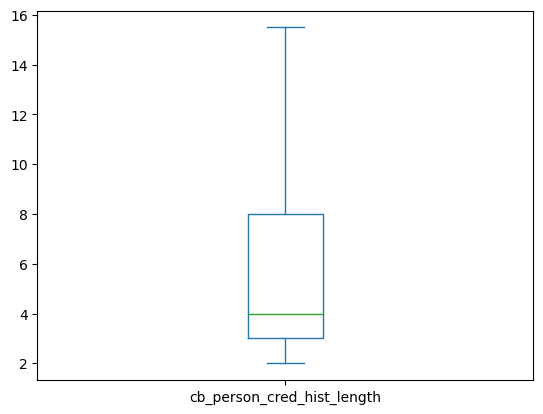

In [20]:
#Treating Outliers
q1=df['cb_person_cred_hist_length'].quantile(0.25)
q3=df['cb_person_cred_hist_length'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

df["cb_person_cred_hist_length"]=df["cb_person_cred_hist_length"].map(lambda x:lower if x<lower else upper if x>upper else x)
df["cb_person_cred_hist_length"].plot(kind="box")

SPRINT 2 - Data Preparation and Model Building

Problem Statement - Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.

Task - Prepare the data and build a model to predict if a customer is going to default or not.

Step - 1: Load the data
Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy
Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).
Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest
Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict).
Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Credit Risk Scoring.

In [21]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23125.0,16.02,1,0.44,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23125.0,15.23,1,0.44,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23125.0,14.27,1,0.44,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,N,15.5
32577,40.5,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,N,15.5
32578,40.5,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23125.0,10.99,1,0.44,N,15.5
32579,40.5,140232.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,N,15.5


In [22]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [23]:
#Identifying the output/target variable
y=df['loan_status']
X=df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [24]:
# Target variable is numerical discrete we can conclude that it is an "Classfication Task"
# Evaluation metric task = Accuracy

In [25]:
# Spliting into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=100)

In [26]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17995,28.0,60000.0,RENT,3.0,MEDICAL,C,23125.0,13.49,0.42,N,10.0
14771,25.0,115000.0,MORTGAGE,9.0,PERSONAL,A,4000.0,6.03,0.03,N,4.0
31533,39.0,101000.0,MORTGAGE,14.5,EDUCATION,C,2500.0,13.47,0.02,Y,15.5
4075,23.0,80000.0,RENT,3.0,EDUCATION,D,4000.0,14.46,0.05,Y,4.0
9221,23.0,21600.0,RENT,5.0,PERSONAL,C,5000.0,13.06,0.23,Y,4.0


In [27]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(24312, 11) (24312,)
(8104, 11) (8104,)


#### Separating categorical and numerical columns

In [28]:
X_train.dtypes

person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object

In [29]:
#Categorical
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
17995,RENT,MEDICAL,C,N
14771,MORTGAGE,PERSONAL,A,N
31533,MORTGAGE,EDUCATION,C,Y
4075,RENT,EDUCATION,D,Y
9221,RENT,PERSONAL,C,Y


In [30]:
#Numerical
X_train_num = X_train.select_dtypes(include=["int64","float64"])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17995,28.0,60000.0,3.0,23125.0,13.49,0.42,10.0
14771,25.0,115000.0,9.0,4000.0,6.03,0.03,4.0
31533,39.0,101000.0,14.5,2500.0,13.47,0.02,15.5
4075,23.0,80000.0,3.0,4000.0,14.46,0.05,4.0
9221,23.0,21600.0,5.0,5000.0,13.06,0.23,4.0


In [31]:
# Scaling on numerical columns
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
#To numpy array
X_train_num_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),
                                 columns=X_train_num.columns,
                                 index=X_train_num.index)
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17995,0.105691,-0.079282,-0.453685,2.370851,0.804688,2.462313,1.159693
14771,-0.465450,1.643664,1.159771,-0.924300,-1.612892,-1.348132,-0.461237
31533,2.199876,1.205096,2.638772,-1.182743,0.798207,-1.445836,2.645546
4075,-0.846211,0.547244,-0.453685,-0.924300,1.119039,-1.152725,-0.461237
9221,-0.846211,-1.282212,0.084134,-0.752005,0.665337,0.605942,-0.461237


In [32]:
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,24312.000000,24312.000000,24312.000000,24312.000000,24312.000000,24312.000000,24312.000000
mean,27.444842,62530.851267,4.687130,9364.622409,11.006950,0.167982,5.707305
std,5.252748,31922.723728,3.718803,5804.102784,3.085793,0.102352,3.701654
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,80000.000000,7.000000,12000.000000,13.160000,0.230000,8.000000
max,40.500000,140232.000000,14.500000,23125.000000,20.040000,0.440000,15.500000


In [33]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 7
Mean of each column: [2.74448421e+01 6.25308513e+04 4.68712981e+00 9.36462241e+03
 1.10069497e+01 1.67981655e-01 5.70730503e+00]
Std of each column: [5.25263975e+00 3.19220672e+04 3.71872669e+00 5.80398342e+03
 3.08572939e+00 1.02350232e-01 3.70157770e+00]


###  OneHot Encoding on categorical columns

In [34]:
for i in cat:
    print("Feature:- ",i)
    print(X_train_cat[i].value_counts(normalize=True))
    print("****************************************************")

Feature:-  person_home_ownership
RENT        0.505800
MORTGAGE    0.412636
OWN         0.078110
OTHER       0.003455
Name: person_home_ownership, dtype: float64
****************************************************
Feature:-  loan_intent
EDUCATION            0.198421
MEDICAL              0.185299
VENTURE              0.174934
PERSONAL             0.170245
DEBTCONSOLIDATION    0.160990
HOMEIMPROVEMENT      0.110110
Name: loan_intent, dtype: float64
****************************************************
Feature:-  loan_grade
A    0.330331
B    0.320870
C    0.196241
D    0.112825
E    0.029985
F    0.007651
G    0.002098
Name: loan_grade, dtype: float64
****************************************************
Feature:-  cb_person_default_on_file
N    0.825806
Y    0.174194
Name: cb_person_default_on_file, dtype: float64
****************************************************


In [35]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
#To numpy array
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
17995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14771,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31533,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4075,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9221,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [36]:
# Concating Train data 
X_train_transformed=pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
17995,0.105691,-0.079282,-0.453685,2.370851,0.804688,2.462313,1.159693,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14771,-0.465450,1.643664,1.159771,-0.924300,-1.612892,-1.348132,-0.461237,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31533,2.199876,1.205096,2.638772,-1.182743,0.798207,-1.445836,2.645546,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4075,-0.846211,0.547244,-0.453685,-0.924300,1.119039,-1.152725,-0.461237,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9221,-0.846211,-1.282212,0.084134,-0.752005,0.665337,0.605942,-0.461237,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Preparing Test Data

In [37]:
#Categorical Test
X_test_cat= X_test.select_dtypes(include=['object'])
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25666,RENT,HOMEIMPROVEMENT,B,N
18151,MORTGAGE,PERSONAL,C,Y
24159,MORTGAGE,MEDICAL,A,N
57,OWN,PERSONAL,A,N
9770,RENT,MEDICAL,C,N


In [38]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
25666,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24159,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25666,33.0,110000.0,3.0,12000.0,10.65,0.11,5.0
18151,31.0,140232.0,14.5,10000.0,13.49,0.06,8.0
24159,31.0,70000.0,4.0,12000.0,6.91,0.17,7.0
57,23.0,140232.0,3.0,23125.0,10.99,0.13,4.0
9770,22.0,25920.0,1.0,9000.0,10.59,0.35,2.0


In [40]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25666,1.057594,1.487032,-0.453685,0.454064,-0.115678,-0.566502,-0.191082
18151,0.676833,2.434089,2.638772,0.109473,0.804688,-1.055021,0.619383
24159,0.676833,0.233981,-0.184776,0.454064,-1.327709,0.019720,0.349228
57,-0.846211,2.434089,-0.453685,2.370851,-0.005493,-0.371095,-0.461237
9770,-1.036592,-1.146882,-0.991503,-0.062823,-0.135122,1.778387,-1.001547


In [41]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
25666,1.057594,1.487032,-0.453685,0.454064,-0.115678,-0.566502,-0.191082,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18151,0.676833,2.434089,2.638772,0.109473,0.804688,-1.055021,0.619383,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24159,0.676833,0.233981,-0.184776,0.454064,-1.327709,0.019720,0.349228,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,-0.846211,2.434089,-0.453685,2.370851,-0.005493,-0.371095,-0.461237,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9770,-1.036592,-1.146882,-0.991503,-0.062823,-0.135122,1.778387,-1.001547,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_transformed,y_train)

LogisticRegression()

In [43]:
y_test_pred=logreg.predict(X_test_transformed)

In [44]:
# calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8661154985192497

# KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8846248766041461

# DT Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8879565646594274

# Random forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9278134254689042

# Recommendation :-

## `As we observed from above algorithms "Random Forest Classifier" performing well for Credit Risk Scoring. .`